In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")
import gc
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
np.random.seed(42)
#import plotly
from datetime import datetime, timedelta
%matplotlib inline


In [2]:
# loading data 
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
translate = pd.read_csv("product_category_name_translation.csv")

In [3]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
translate.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [6]:
df1 = order_items.merge(order_payments, on='order_id')

df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [7]:
df2 = df1.merge(orders, on='order_id')

In [8]:
df3 = df2.merge(customers, on='customer_id')

In [9]:
prod=df3.merge(product, on='product_id')

In [10]:
prod_en=prod.merge(translate, on = 'product_category_name')

In [11]:
prod_en.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,73.86,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,83.23,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,75.07,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,72.19,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [12]:
prod_en['product_category_name_english'].describe()

count             115878
unique                71
top       bed_bath_table
freq               11823
Name: product_category_name_english, dtype: object

In [21]:
prod_en['InvoiceDate'] = pd.to_datetime(prod_en['order_purchase_timestamp'])

In [22]:
prod_en.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,InvoiceDate
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-09-13 08:59:02
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,73.86,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-06-28 11:52:20
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,83.23,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,2018-05-18 10:25:53
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,75.07,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-08-01 18:38:42
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,72.19,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-08-10 21:48:40


In [24]:
from datetime import datetime, timedelta,date
prod_10m = prod_en[(prod_en.InvoiceDate < date(2017,9,1)) & (prod_en.InvoiceDate >= date(2017,1,1))].reset_index(drop=True)
prod_next = prod_en[(prod_en.InvoiceDate >= date(2017,9,1)) & (prod_en.InvoiceDate < date(2018,9,1))].reset_index(drop=True)

In [25]:
df_prod = pd.DataFrame(prod_10m['product_category_name_english'].unique())
df_prod.columns = ['product_category_name_english']


In [ ]:
df_prod.head()

In [26]:
df_prod['product_category_name_english'].nunique()

69

In [27]:
prod_next_purchase_df= prod_next.groupby('product_category_name_english').InvoiceDate.min().reset_index()

In [28]:
prod_next_purchase_df.columns = ['product_category_name_english','MinPurchaseDate']
prod_next_purchase_df.head()

,product_category_name_english,MinPurchaseDate
0,agro_industry_and_commerce,2017-09-05 16:19:06
1,air_conditioning,2017-09-06 20:42:46
2,art,2017-09-04 18:09:28
3,arts_and_craftmanship,2018-04-22 20:15:52
4,audio,2017-09-04 19:01:29


In [32]:
prod_last_purchase_df= prod_10m.groupby('product_category_name_english').InvoiceDate.max().reset_index()

In [33]:
prod_last_purchase_df.columns = ['product_category_name_english','MaxPurchaseDate']

In [34]:
prod_dates_df = pd.merge(prod_last_purchase_df,prod_next_purchase_df,on='product_category_name_english',how='left')

In [35]:
prod_dates_df.tail()

,product_category_name_english,MaxPurchaseDate,MinPurchaseDate
64,stationery,2017-08-31 15:16:50,2017-09-01 10:33:59
65,tablets_printing_image,2017-08-29 00:01:27,2017-09-06 07:36:35
66,telephony,2017-08-31 20:47:58,2017-09-01 00:13:26
67,toys,2017-08-31 21:44:52,2017-09-01 01:49:20
68,watches_gifts,2017-08-31 22:22:19,2017-09-01 08:18:39


In [36]:
prod_dates_df['NextPurchaseDay'] = (prod_dates_df['MinPurchaseDate'] - prod_dates_df['MaxPurchaseDate']).dt.days

In [37]:
prod_dates_df.tail()

,product_category_name_english,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
64,stationery,2017-08-31 15:16:50,2017-09-01 10:33:59,0
65,tablets_printing_image,2017-08-29 00:01:27,2017-09-06 07:36:35,8
66,telephony,2017-08-31 20:47:58,2017-09-01 00:13:26,0
67,toys,2017-08-31 21:44:52,2017-09-01 01:49:20,0
68,watches_gifts,2017-08-31 22:22:19,2017-09-01 08:18:39,0


In [38]:
#recency

max_purchase_df = prod_10m.groupby('product_category_name_english').InvoiceDate.max().reset_index()
max_purchase_df.columns = ['product_category_name_english','MaxPurchaseDate']

In [39]:
max_purchase_df['Recency'] = (max_purchase_df['MaxPurchaseDate'].max() - max_purchase_df['MaxPurchaseDate']).dt.days

In [40]:
prod_dates_df = pd.merge(prod_dates_df, max_purchase_df[['product_category_name_english','Recency']], on='product_category_name_english')

In [41]:
prod_dates_df.head()

,product_category_name_english,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,Recency
0,agro_industry_and_commerce,2017-08-30 23:28:35,2017-09-05 16:19:06,5,1
1,air_conditioning,2017-08-31 16:51:48,2017-09-06 20:42:46,6,0
2,art,2017-08-29 22:29:48,2017-09-04 18:09:28,5,2
3,arts_and_craftmanship,2017-07-12 06:48:11,2018-04-22 20:15:52,284,50
4,audio,2017-08-25 17:39:38,2017-09-04 19:01:29,10,6


In [42]:
recency_prod= prod_dates_df[['product_category_name_english', 'Recency']]
recency_prod.head(10)

,product_category_name_english,Recency
0,agro_industry_and_commerce,1
1,air_conditioning,0
2,art,2
3,arts_and_craftmanship,50
4,audio,6
5,auto,0
6,baby,0
7,bed_bath_table,0
8,books_general_interest,0
9,books_imported,10


In [43]:
 orderd= recency_prod.sort_values(by='Recency',ascending=False)

In [44]:
r = orderd.groupby('product_category_name_english')['Recency'].mean().sort_values().tail(15)

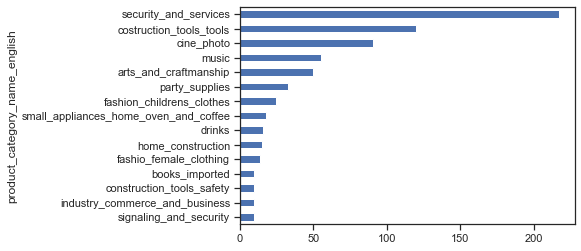

In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
r.plot(kind='barh')

In [46]:
#Frequency

prod_frequency = prod_10m.groupby('product_category_name_english').InvoiceDate.count().reset_index()
prod_frequency.columns = ['product_category_name_english','Frequency']

prod_frequency.head()



,product_category_name_english,Frequency
0,agro_industry_and_commerce,24
1,air_conditioning,91
2,art,35
3,arts_and_craftmanship,2
4,audio,76


In [47]:
prod_dates_df = pd.merge(prod_dates_df, prod_frequency, on='product_category_name_english')
prod_dates_df.head()

,product_category_name_english,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,Recency,Frequency
0,agro_industry_and_commerce,2017-08-30 23:28:35,2017-09-05 16:19:06,5,1,24
1,air_conditioning,2017-08-31 16:51:48,2017-09-06 20:42:46,6,0,91
2,art,2017-08-29 22:29:48,2017-09-04 18:09:28,5,2,35
3,arts_and_craftmanship,2017-07-12 06:48:11,2018-04-22 20:15:52,284,50,2
4,audio,2017-08-25 17:39:38,2017-09-04 19:01:29,10,6,76


In [48]:
f = prod_dates_df.groupby('product_category_name_english')['Frequency'].mean().sort_values().tail(15)

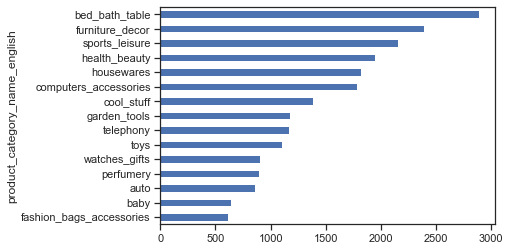

In [49]:
f.plot(kind='barh')

In [50]:
prod_dates_df['Frequency'].count()

69

# Revenue per product 

In [51]:
prod_10m['Revenue'] = prod_10m['price'] * prod_10m['order_item_id']

In [53]:
prod_revenue_df = prod_10m.groupby('product_category_name_english').Revenue.sum().reset_index()
prod_revenue_df.head()

,product_category_name_english,Revenue
0,agro_industry_and_commerce,4808.71
1,air_conditioning,22400.82
2,art,8999.45
3,arts_and_craftmanship,173.88
4,audio,8243.74


In [54]:
prod_dates_df = pd.merge(prod_dates_df, prod_revenue_df, on='product_category_name_english')

In [55]:
prod_dates_df.head()

,product_category_name_english,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,Recency,Frequency,Revenue
0,agro_industry_and_commerce,2017-08-30 23:28:35,2017-09-05 16:19:06,5,1,24,4808.71
1,air_conditioning,2017-08-31 16:51:48,2017-09-06 20:42:46,6,0,91,22400.82
2,art,2017-08-29 22:29:48,2017-09-04 18:09:28,5,2,35,8999.45
3,arts_and_craftmanship,2017-07-12 06:48:11,2018-04-22 20:15:52,284,50,2,173.88
4,audio,2017-08-25 17:39:38,2017-09-04 19:01:29,10,6,76,8243.74


In [57]:
r = prod_dates_df.groupby('product_category_name_english')['Revenue'].mean().sort_values().tail(15)

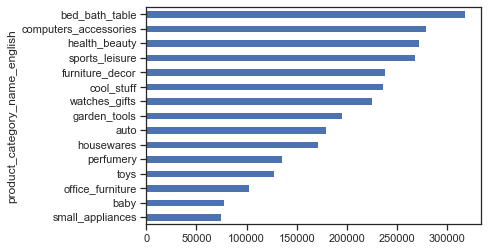

In [58]:
r.plot(kind='barh')

# K means clustering for overall scores


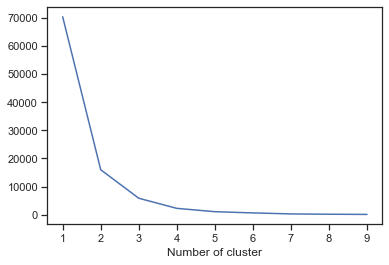

In [63]:
from sklearn.cluster import KMeans
sse={}
prod_recency = prod_dates_df[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(prod_recency)
    prod_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(prod_dates_df[['Recency']])
prod_dates_df['RecencyCluster'] = kmeans.predict(prod_dates_df[['Recency']])

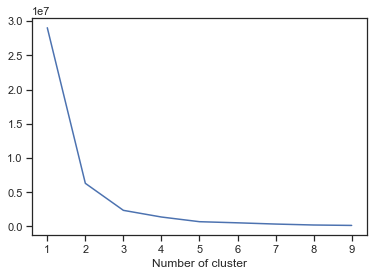

In [67]:
from sklearn.cluster import KMeans
sse={}
prod_frequency = prod_dates_df[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(prod_frequency)
    prod_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(prod_dates_df[['Frequency']])
prod_dates_df['FrequencyCluster'] = kmeans.predict(prod_dates_df[['Frequency']])

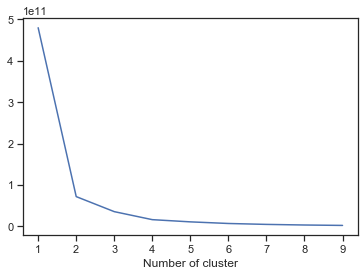

In [69]:
sse={}
prod_revenue = prod_dates_df[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(prod_revenue)
    prod_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [70]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(prod_dates_df[['Revenue']])
prod_dates_df['RevenueCluster'] = kmeans.predict(prod_dates_df[['Revenue']])

In [71]:
prod_dates_df.head()

,product_category_name_english,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster
0,agro_industry_and_commerce,2017-08-30 23:28:35,2017-09-05 16:19:06,5,1,24,4808.71,1,0,0
1,air_conditioning,2017-08-31 16:51:48,2017-09-06 20:42:46,6,0,91,22400.82,1,0,0
2,art,2017-08-29 22:29:48,2017-09-04 18:09:28,5,2,35,8999.45,1,0,0
3,arts_and_craftmanship,2017-07-12 06:48:11,2018-04-22 20:15:52,284,50,2,173.88,0,0,0
4,audio,2017-08-25 17:39:38,2017-09-04 19:01:29,10,6,76,8243.74,1,0,0


In [72]:
prod_dates_df['OverallScore'] = prod_dates_df['RecencyCluster'] + prod_dates_df['FrequencyCluster'] + prod_dates_df['RevenueCluster']

In [121]:
prod_dates_df.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,79.000000,5.000000,881.317500
1,5.139535,67.744186,9172.146977
2,217.000000,1.000000,183.290000
3,0.250000,1257.000000,161612.284167
4,0.000000,1079.500000,208721.880000
5,0.000000,882.000000,90963.438000


In [76]:
prod_dates_df.groupby('OverallScore')['Recency'].count()

OverallScore
0     4
1    43
2     1
3    12
4     4
5     5
Name: Recency, dtype: int64

In [79]:
prod_dates_df['Segment'] = 'Low-Value'
prod_dates_df.loc[prod_dates_df['OverallScore']>2,'Segment'] = 'Mid-Value' 
prod_dates_df.loc[prod_dates_df['OverallScore']>4,'Segment'] = 'High-Value'

In [81]:
prod_dates_df.head(100)

,product_category_name_english,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,Segment
0,agro_industry_and_commerce,2017-08-30 23:28:35,2017-09-05 16:19:06,5,1,24,4808.71,1,0,0,1,Low-Value
1,air_conditioning,2017-08-31 16:51:48,2017-09-06 20:42:46,6,0,91,22400.82,1,0,0,1,Low-Value
2,art,2017-08-29 22:29:48,2017-09-04 18:09:28,5,2,35,8999.45,1,0,0,1,Low-Value
3,arts_and_craftmanship,2017-07-12 06:48:11,2018-04-22 20:15:52,284,50,2,173.88,0,0,0,0,Low-Value
4,audio,2017-08-25 17:39:38,2017-09-04 19:01:29,10,6,76,8243.74,1,0,0,1,Low-Value
5,auto,2017-08-31 20:46:59,2017-09-01 07:59:19,0,0,855,179215.78,1,2,1,4,Mid-Value
6,baby,2017-08-31 17:46:40,2017-09-01 08:14:59,0,0,640,77200.19,1,2,2,5,High-Value
7,bed_bath_table,2017-08-31 22:39:02,2017-09-01 08:56:21,0,0,2890,317665.19,1,1,1,3,Mid-Value
8,books_general_interest,2017-08-31 23:37:47,2017-09-02 14:15:11,1,0,131,14183.99,1,0,0,1,Low-Value
9,books_imported,2017-08-21 19:07:53,2017-09-03 16:48:45,12,10,5,348.48,1,0,0,1,Low-Value


In [83]:
seg= prod_dates_df[['product_category_name_english', 'Segment']]

In [85]:
seg.tail()

,product_category_name_english,Segment
64,stationery,Low-Value
65,tablets_printing_image,Low-Value
66,telephony,High-Value
67,toys,High-Value
68,watches_gifts,Mid-Value


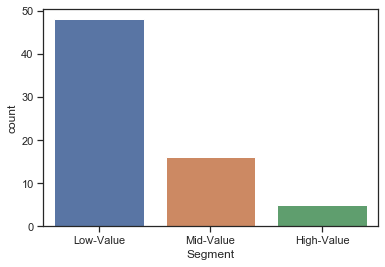

In [113]:
sns.countplot(prod_dates_df['Segment']);

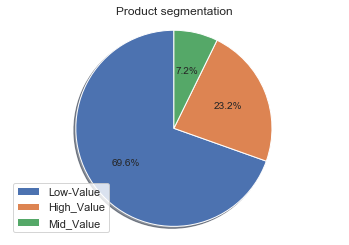

In [114]:
fig1, ax1 = plt.subplots()
data= prod_dates_df['Segment'].value_counts()

labels= ['Low-Value', 'High_Value', 'Mid_Value']
ax1.pie(data, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Product segmentation')
plt.legend(labels,loc=3)
plt.show()